## **Анализ тенденций и предикторов психического здоровья среди студентов**

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns

В начале загрузим файл, посмотрим данные на наличие пропусков и дубликатов.

In [2]:
students = pd.read_csv(r"C:\Users\Arina\Downloads\student_depression_dataset.csv")

In [3]:
students.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

В датасете 18 столбцов, пропусков нет.
Нужно поменять тип данных в столбце Financial Stress, привести столбцы к нижнему "змеиному" регситру, проверить полные и неполные дубликаты в данных. А также проверить данные на аномалии.

## Предобработка данных

Меняем тип данных в столбце Financial Stress на числовой.

In [5]:
students['Financial Stress'] = pd.to_numeric(students['Financial Stress'], errors='coerce')

In [6]:
students['Financial Stress']=students['Financial Stress'].astype('float')

Приводим столбцы к нижнему и "змеиному" регистру.

In [7]:
students.columns = students.columns.str.replace(' ', '_').str.lower()

In [8]:
students.columns

Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')

Далее проверим на наличие полных дубликатов.

In [9]:
f"Всего полных дубликатов: {students.duplicated().sum()}"

'Всего полных дубликатов: 0'

Проверим дубликаты одновременно по id, полу, возрасту, городу и профессии.

In [10]:
students.loc[students.duplicated(subset=['id', 'age', 'city', 'gender'], keep=False)].count()

id                                       0
gender                                   0
age                                      0
city                                     0
profession                               0
academic_pressure                        0
work_pressure                            0
cgpa                                     0
study_satisfaction                       0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64

Проверим на наличие неявных дубликатов.

In [11]:
students['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
students['city'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Посмотрим распределение студентов по возрасту.

In [13]:
students['age'].describe()

count    27901.000000
mean        25.822300
std          4.905687
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

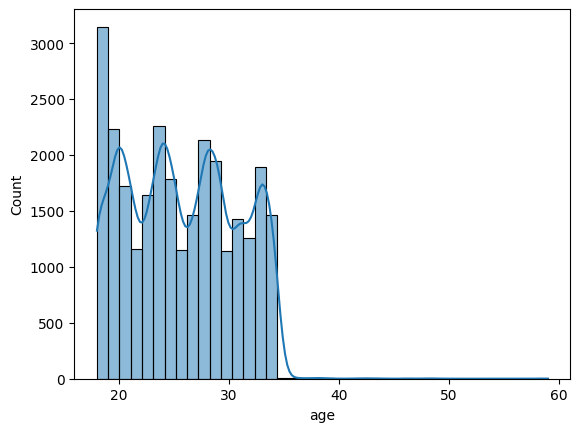

In [14]:
sns.histplot(students['age'], kde=True, bins=40)

С распределением все нормально: большинство студентов до 35 лет, самый большой возраст - 59 лет. Самый минимальный - 18, детей нет. Причем на графике видна большая "пика" в районе 18-20 лет.

In [15]:
columns = ['work_pressure', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'work/study_hours', 'financial_stress']

# Проходим по каждому столбцу в списке
for column in columns:
    # Выводим уникальные значения для каждого столбца
    unique_values = students[column].unique()
    print(f"Уникальные значения для столбца '{column}':")
    print(unique_values)
    print()

Уникальные значения для столбца 'work_pressure':
[0. 5. 2.]

Уникальные значения для столбца 'study_satisfaction':
[2. 5. 3. 4. 1. 0.]

Уникальные значения для столбца 'job_satisfaction':
[0. 3. 4. 2. 1.]

Уникальные значения для столбца 'sleep_duration':
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']

Уникальные значения для столбца 'dietary_habits':
['Healthy' 'Moderate' 'Unhealthy' 'Others']

Уникальные значения для столбца 'degree':
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']

Уникальные значения для столбца 'work/study_hours':
[ 3.  9.  4.  1.  0. 12.  2. 11. 10.  6.  8.  5.  7.]

Уникальные значения для столбца 'financial_stress':
[ 1.  2.  5.  3.  4. nan]



In [16]:
students['cgpa'].min()

np.float64(0.0)

In [17]:
students['cgpa'].max()

np.float64(10.0)

С данными все впорядке, отсутствуют экстримально большие и экстримально низкие значения.
Далее можно переходить к анализу данных.

## Анализ данных

В ходе анализа данных нужно ответить на следующие вопросы:
1) Каково распределение студентов по полу? Есть ли разница среди студентов и студенток по количеству депрессией?
2) Как распределены профессии по количеству студентов? Можно ли попытаться найти корелляцию между специальностями и кол-вом депрессий?
3) Построить матрицу коррелляции и проанализировать ее.
4) Меняется ли кол-во депрессий с возрастом студента?
5) Выделить 3 категории в зависимости от степени студента: Без степени, Бакалавр, Магистр,- и проанализировать, влияет ли отсутствуе/наличие степени на депрессию?
6) Есть ли взаимосвязь между продолжительностью сна и депрессией?
7) Есть ли взаимосвязь между пищевыми привычками и депрессией?

1) Каково распределение студентов по полу? Есть ли разница среду студентов и студенток по количеству депрессией?

,index,gender,количество студентов
0,1,Male,15547
1,0,Female,12354


C:\Users\Arina\AppData\Local\Temp\ipykernel_11064\3547172099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=students, color='green', palette='pastel')


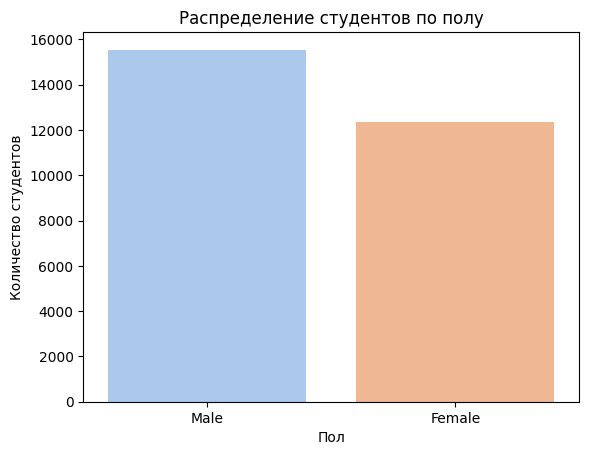

In [18]:
display(students.groupby('gender').size().reset_index(name='количество студентов').sort_values(by='количество студентов', ascending=False).reset_index())

sns.countplot(x='gender', data=students, color='green', palette='pastel')
plt.title('Распределение студентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')

plt.show()

,gender,depression,total_gender,percentage%
1,Male,9115,15547,58.628674
0,Female,7221,12354,58.450704


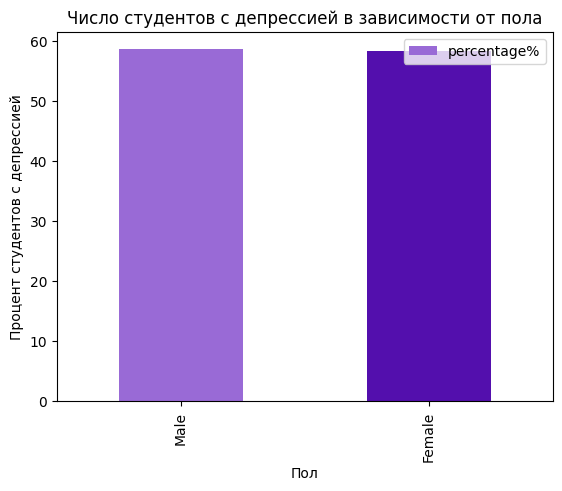

In [19]:
result = students.query('depression==1').pivot_table(index='gender', values='depression', aggfunc='count').reset_index()
total_counts = students['gender'].value_counts()
result = result.merge(total_counts.rename('total_gender'), left_on='gender', right_index=True)
result['percentage%'] = result['depression'] / result['gender'].map(total_counts) * 100
result = result.sort_values(by='percentage%', ascending=False)
display(result)
colors = ['#996AD6', '#530FAD', '#330570']
result.plot(kind='bar', x='gender', y= 'percentage%', color=colors)

plt.title('Число студентов с депрессией в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Процент студентов с депрессией')

plt.show()

Юношей больше, чем девушек. Но депрессией страдает примерно одинаковый процент учащихся вне зависимости от пола.

2) Как распределены профессии? Можно ли попытаться найти корелляция между специальностями и кол-вом депрессий?

In [20]:
students['profession'].unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

In [21]:
students.groupby('profession').size().reset_index(name='количество студентов').sort_values(by='количество студентов', ascending=False)


,profession,количество студентов
12,Student,27870
5,Architect,8
13,Teacher,6
2,'Digital Marketer',3
1,'Content Writer',2
6,Chef,2
11,Pharmacist,2
7,Doctor,2
0,'Civil Engineer',1
3,'Educational Consultant',1


Большинство студентов ещё не имеют специальности, скорее всего это 1-2 курсы, ещё до выбора специализации. 

3) Далее построим матрицу корреляции и посмотрим, есть ли корреляция между показателями.

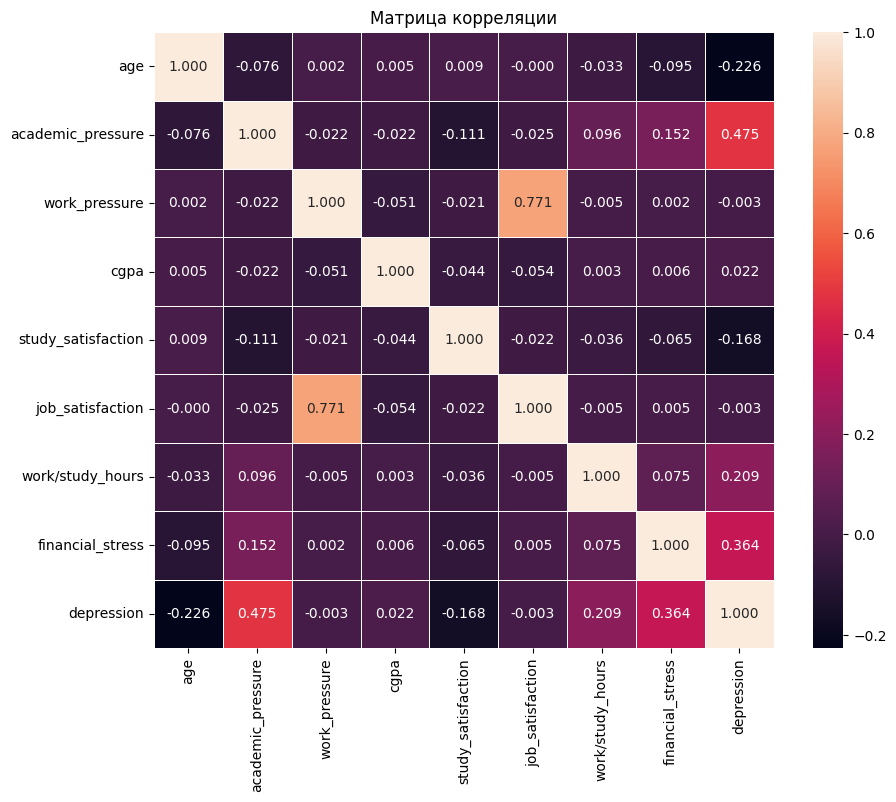

In [22]:
students['id'] = students['id'].astype('str') # поменяем тип у id, чтобы не попал в матрицу корреляции

num_col = students.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = students[num_col].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.3f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

Есть небольшая прямая коррелляция между давлением на работе и удовлетворением работой; дерессией и академическим давлением.
Небольшая обратная корреляция: депрессия и возраст; депрессия и неудовлевторенность учебой.

4) Меняется ли кол-во депрессий с возрастом студента?

In [23]:
result = students.query('depression==1').pivot_table(index='age', values='depression', aggfunc='count').reset_index()
total_counts = students['age'].value_counts()

# Добавление столбца с процентом от общего количества
result['percentage%'] = result['depression'] / result['age'].map(total_counts) * 100
result

,age,depression,percentage%
0,18.0,1216,76.622558
1,19.0,1100,70.512821
2,20.0,1579,70.585606
3,21.0,1169,67.728853
4,22.0,701,60.431034
5,23.0,1051,63.890578
6,24.0,1509,66.829052
7,25.0,1082,60.650224
8,26.0,663,57.402597
9,27.0,887,60.670315


В датасете всего один/два человека в возврасте выше 35, поэтому при построении графика их не учитываю.

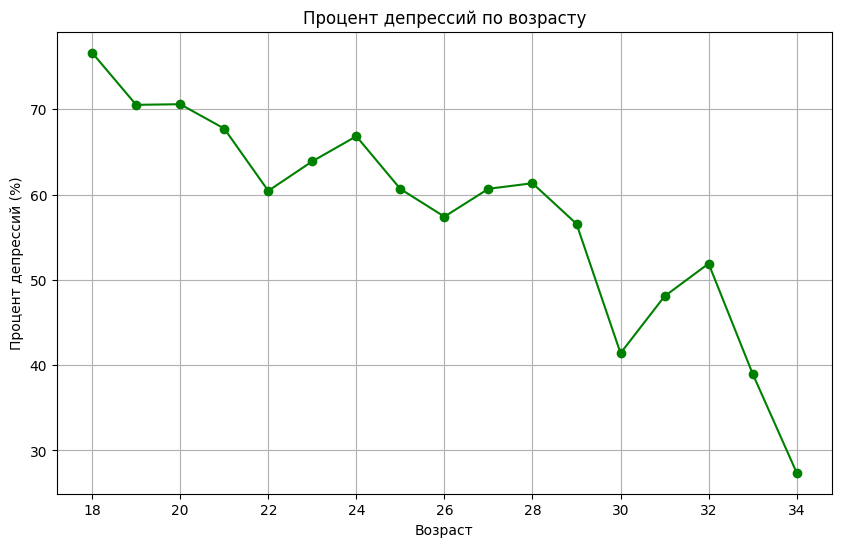

In [24]:
result=result.query('age<35')
plt.figure(figsize=(10, 6))
plt.plot(result['age'], result['percentage%'], marker='o', linestyle='-', color='g')


plt.title('Процент депрессий по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Процент депрессий (%)')
plt.grid(True)
plt.show()

Как видно на графике, чем меньше возраст, тем выше кол-во студентов с депрессией.

5) Выделить 3 категории в зависимости от степени студента: Без степени, Бакалавр, Магистр и проанализировать, влияет ли отсутствуе/наличие степени на депрессию?

In [25]:
students['degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [26]:
students['degree'].value_counts()

degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
BBA            696
MBBS           696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            522
LLM            482
MHM            191
ME             185
Others          35
Name: count, dtype: int64

In [27]:
result = students.query('depression==1').pivot_table(index='degree', values='depression', aggfunc='count').reset_index()
total_counts = students['degree'].value_counts()

# Добавление столбца с процентом от общего количества
result['percentage%'] = result['depression'] / result['degree'].map(total_counts) * 100
result.sort_values(by='percentage%', ascending=False)

,degree,depression,percentage%
0,'Class 12',4303,70.773026
26,Others,21,60.000000
1,B.Arch,871,58.930988
11,BSc,523,58.896396
7,BBA,407,58.477011
20,MBBS,404,58.045977
8,BCA,819,57.152826
25,MSc,679,57.058824
5,B.Tech,655,56.857639
2,B.Com,853,56.640106


На основе столбца degree создадим новый с 3-мя категориями "Без степени", "Бакалавр", "Магистр" и посмотрим, как обстоят дела с депрессией.

In [28]:
def categorize_degree(degree):
    if degree == "'Class 12'":
        return 'Без степени'  # Классифицируем 'Class 12' как 'Без степени'
    elif degree in ['B.Pharm', 'BSc', 'BA', 'BCA', 'B.Ed', 'LLB', 'BE', 'BHM', 'B.Com', 'B.Arch', 'BBA', 'B.Tech']:
        return 'Бакалавр'  # Все бакалаврские степени
    elif degree in ['M.Tech', 'PhD', 'M.Ed', 'MSc', 'M.Pharm', 'MCA', 'MA', 'MD', 'MBA', 'M.Com', 'LLM', 'ME', 'MHM']:
        return 'Магистр'  # Все магистерские степени
    else:
        return None  # Для 'Others' оставляем пустую категорию

# Применяем функцию к столбцу 'degree' и создаем новый столбец 'category'
students['category_degree'] = students['degree'].apply(categorize_degree)

In [29]:
students['category_degree'].value_counts()

category_degree
Бакалавр       12639
Магистр         8451
Без степени     6080
Name: count, dtype: int64

Бакалавров больше, чем студентов без степени.

,category_degree,depression,total_category_degree,percentage%
1,Без степени,4303,6080,70.773026
0,Бакалавр,7097,12639,56.151594
2,Магистр,4511,8451,53.378298


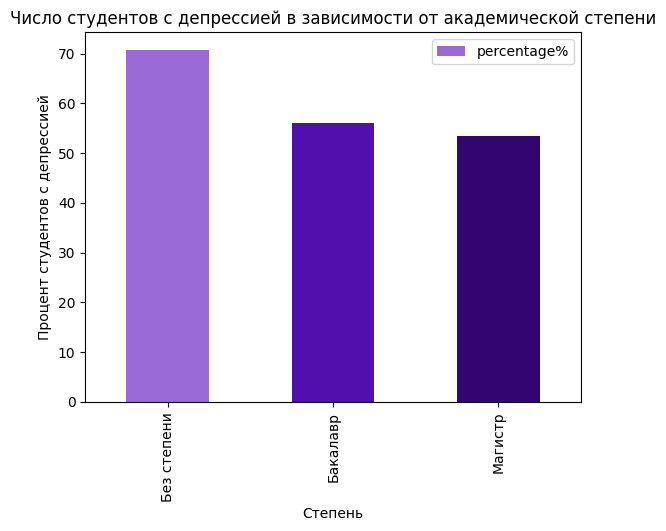

In [30]:
result = students.query('depression==1').pivot_table(index='category_degree', values='depression', aggfunc='count').reset_index()
total_counts = students['category_degree'].value_counts()
result = result.merge(total_counts.rename('total_category_degree'), left_on='category_degree', right_index=True)
result['percentage%'] = result['depression'] / result['category_degree'].map(total_counts) * 100
result = result.sort_values(by='percentage%', ascending=False)
display(result)

result.plot(kind='bar', x='category_degree', y= 'percentage%', color=colors)
plt.title('Число студентов с депрессией в зависимости от академической степени')
plt.xlabel('Степень')
plt.ylabel('Процент студентов с депрессией')
plt.show()

У студентов без степени чаще возникает депрессия, чем у бакалавров и магистров: в одном из предыдущих шагов уже выяснили, что с возрастом кол-во депрессий уменьшается, тут это подтверждается: студенты без степени чаще всего это студенты 18-20 лет.

6) Есть ли взаимосвязь между продолжительностью сна и депрессией?

In [31]:
students['sleep_duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [32]:
students['sleep_duration'] = students['sleep_duration'].str.replace("'", "")

,sleep_duration,depression,percentage%
2,Less than 5 hours,5361,64.512635
1,7-8 hours,4371,59.501770
0,5-6 hours,3517,56.881773
3,More than 8 hours,3078,50.926539
4,Others,9,50.000000


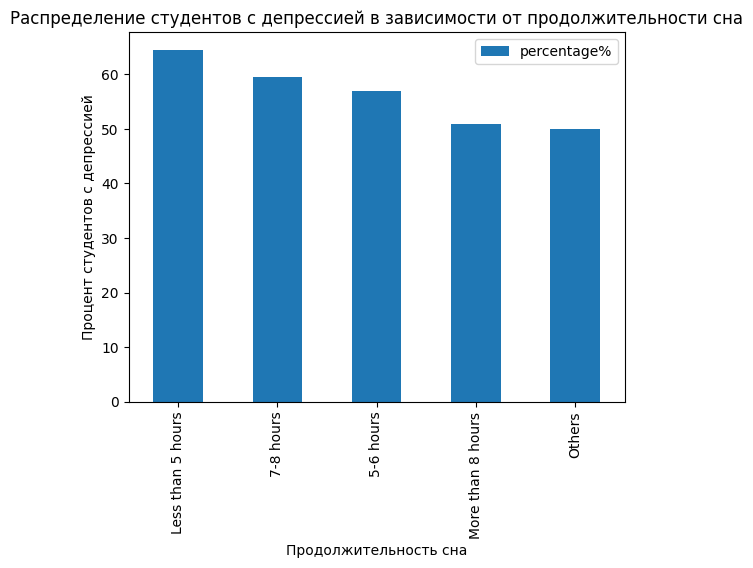

In [33]:
result = students.query('depression==1').pivot_table(index='sleep_duration', values='depression', aggfunc='count').reset_index()
total_counts = students['sleep_duration'].value_counts()
result['percentage%'] = result['depression'] / result['sleep_duration'].map(total_counts) * 100
result = result.sort_values(by='percentage%', ascending=False)
display(result)

result.plot(kind='bar', x='sleep_duration', y= 'percentage%')
plt.title('Распределение студентов с депрессией в зависимости от продолжительности сна')
plt.xlabel('Продолжительность сна')
plt.ylabel('Процент студентов с депрессией')
plt.show()

У студентов, которые спят меньше 5 часов, чаще наблюдается депрессия. Отсутствие здорове сна является фактором, провоцирующим депрессию.

7) Есть ли взаимосвязь между пищевыми привычками и депрессией?

,dietary_habits,depression,percentage%
3,Unhealthy,7297,70.727925
2,Others,8,66.666667
1,Moderate,5558,56.022578
0,Healthy,3473,45.392759


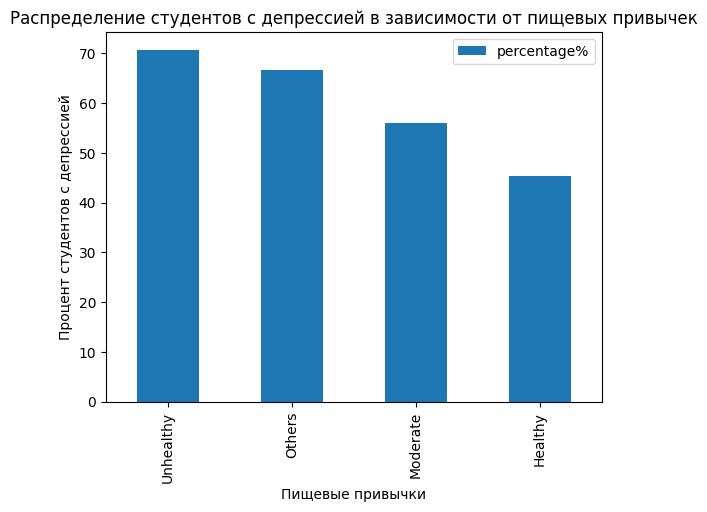

In [34]:
result = students.query('depression==1').pivot_table(index='dietary_habits', values='depression', aggfunc='count').reset_index()
total_counts = students['dietary_habits'].value_counts()
result['percentage%'] = result['depression'] / result['dietary_habits'].map(total_counts) * 100
result = result.sort_values(by='percentage%', ascending=False)
display(result)

result.plot(kind='bar', x='dietary_habits', y= 'percentage%')
plt.title('Распределение студентов с депрессией в зависимости от пищевых привычек')
plt.xlabel('Пищевые привычки')
plt.ylabel('Процент студентов с депрессией')
plt.show()

У студентов с нездоровыми пищевыми привычками чаще наблюдается депрессия. Это закономерно, так как ездоровое питание повышает риски развития депресии, и это характерно не только для студентов.